In [80]:
#Loading the dataset
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 


In [81]:
import os
os.environ['KERAS_BACKEND'] = 'theano'
import keras as ks

In [82]:
import sys
import keras
print(sys.version)
print(keras.__version__)

3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) 
[GCC 7.3.0]
2.2.2


In [83]:
#load the datasets
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [84]:
print("training images:{}".format(x_train.shape))
print("testing images:{}".format(x_test.shape))

training images:(50000, 32, 32, 3)
testing images:(10000, 32, 32, 3)


In [85]:
print(x_train[0].shape)

(32, 32, 3)


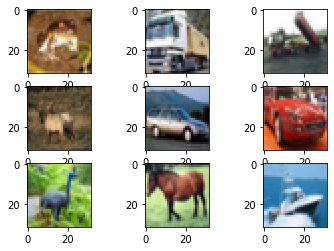

In [96]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = x_train[i]
    plt.imshow(img) 
    
plt.show()

In [87]:
#prepocessing dataset

#FIX random seed reproducebility

seed = 6
np.random.seed(seed)

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

#normalize the input from 0-255 to 0.0 -1.0


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

In [88]:
#class lable
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [89]:
#[6] = [0,0,0,0,0,1,0,0,0] one hot vector

#hot encode output
y_train = np_utils.to_categorical(y_train) 
y_test= np_utils.to_categorical(y_test)
num_class = y_test.shape[1]



print(num_class)

print(y_train.shape)
print(y_train[0])


10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [97]:
#bulid CNN model
from keras.models import Sequential
from keras.layers import Dropout,Activation,Conv2D,GlobalAvgPool2D
from keras.optimizers import SGD

In [139]:
#define model function
def allcnn(weights = None):
    #define model type
    model = Sequential()
    
    #add model layer
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2, 2)))
    model.add(Dropout(0.5))
              
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))
              
    #global average pooling layer with softmax activation
    model.add(GlobalAvgPool2D())
    model.add(Activation('softmax'))
    
    #loads the weight
    if weights:
              model.load_weights(weights)
    
    return model
              
    
    
    

In [140]:
#DEFINE HYPERPARAMETER
#you can find this parameters by grid search

learning_rate=0.01
weight_decay= 1e-6
momentum = 0.9

weights='all_cnn_weights_0.9088_0.4994.hdf5'
model=allcnn(weights)

#define optimizer and compile model
sgd = SGD(lr=learning_rate,decay=weight_decay,momentum=momentum,nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

#print model summary
print(model.summary())


#test the model with pretrained weight
scores=model.evaluate(x_test, y_test, verbose=1)
print('Accuracy:{}'.format(scores[1]))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_118 (Conv2D)          (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_92 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_93 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_27 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 16, 16, 192)       166080    
__________

In [141]:
#making a class of class labels and names
classes = range(0,10)
names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

#zip the names and class  to make a dict of class labeles
class_labels=dict(zip(classes, names))
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [146]:
#generate batch of 9 images to predict
batch = x_test[100:109]
labels = np.argmax(y_test[100:109], axis=-1)

#make this prediction
predictions = model.predict(batch, verbose=1)


9/9 [==============================] - 0s 12ms/step


In [147]:
#print our prediction
print(predictions)

[[4.56472300e-18 1.05810246e-20 1.89234586e-10 2.14116086e-11
  9.99999285e-01 2.80374707e-07 3.14789075e-13 4.23810434e-07
  1.36995572e-19 1.20970667e-18]
 [2.11908215e-16 2.03863923e-17 1.56725277e-09 5.35813570e-07
  1.62561714e-10 9.99999404e-01 1.67123959e-09 2.07823874e-08
  3.65480529e-15 3.51285977e-16]
 [1.27203225e-30 5.02730693e-28 5.15396277e-24 3.60512695e-21
  1.08750571e-27 8.15215322e-22 1.00000000e+00 1.10509080e-27
  6.19241431e-32 1.22742394e-23]
 [1.51438863e-16 4.76694219e-18 2.25839103e-09 1.00000000e+00
  4.34816280e-11 1.68842750e-12 4.53172954e-13 2.66873612e-16
  7.26597053e-19 6.20511257e-17]
 [8.24992055e-36 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 9.35630438e-36
  8.68653086e-30 8.21906932e-22]
 [5.96997311e-24 1.00000000e+00 7.54841125e-27 8.02283790e-27
  1.97139506e-30 2.73387140e-29 7.21868354e-31 5.56799443e-27
  1.61867448e-26 1.19061960e-13]
 [6.45632997e-18 2.96424244e-20 1.00464949e-11 9.99999881e

In [148]:
#these are class probabilities, should sum to 1
for image in predictions:
    print(np.sum(image))

1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [149]:
#use np.argmax() to convert class probalities to class labels
class_result = np.argmax(predictions, axis=-1)
print(class_result)


[4 5 6 3 1 1 3 6 8]


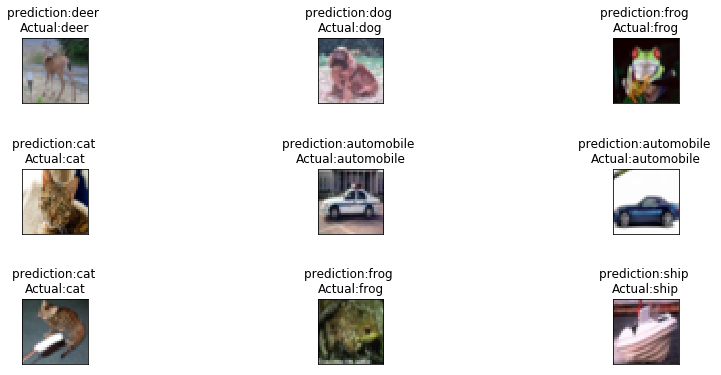

In [152]:
#create a grid of 3*3 images
fig,axs=plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i, img in enumerate(batch):
    #determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title= 'prediction:{} \nActual:{}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    #plot the images
    axs[i].imshow(img)
#show the plot
plt.show()